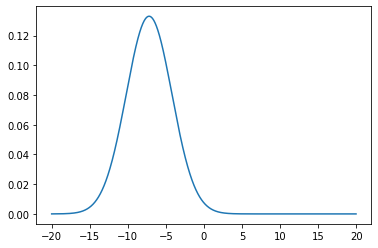

In [19]:
import ipdb
import numpy as np
import matplotlib.pyplot as plt

import skneuromsi as sknm


def auditory_stimulus(auditory_sigma, posible_locations, auditory_location):
    sigma = auditory_sigma
    location = auditory_location
    plocations = posible_locations

    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(
        -1 * (((plocations - location) ** 2) / (2 * sigma ** 2))
    )


def visual_stimulus(posible_locations, visual_sigma, visual_location):
    plocations = posible_locations
    location = visual_location
    sigma = visual_sigma

    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(
        -1 * (((plocations - location) ** 2) / (2 * sigma ** 2))
    )


def multisensory_stimulus(
    multisensory_sigma,
    posible_locations,
    visual_location,
    auditory_location,
    visual_sigma,
    auditory_sigma
):
    """
    Computes multisensory estimate
    """

    sigma = multisensory_sigma
    auditory_weight = visual_sigma ** 2 / (auditory_sigma ** 2 + visual_sigma ** 2)
    visual_weight = auditory_sigma ** 2 / (visual_sigma ** 2 + auditory_sigma ** 2)

    location = visual_weight * visual_location + auditory_weight * auditory_location
    plocations = posible_locations

    return (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(
        -1 * (((plocations - location) ** 2) / (2 * sigma ** 2))
    )


@sknm.neural_msi_model
class AlaisBurr2004:

    # hiper parameters
    posible_locations = sknm.hparameter(
        factory=lambda: np.arange(-20, 20, 0.01)
    )
    auditory_sigma = sknm.hparameter(default=3.0)
    visual_sigma = sknm.hparameter(default=4.0)

    # internals
    #auditory_weight = sknm.internal(default=1.0)
    #visual_weight = sknm.internal(default=2.0)
    multisensory_sigma = sknm.internal(default=3.0)

    # estimulii!
    stimuli = [auditory_stimulus, visual_stimulus]
    integration = multisensory_stimulus


model = AlaisBurr2004()
out = model.run(visual_location=-20, auditory_location=0)

plt.plot(model.posible_locations,out);

In [17]:
# Maybe change run to give unisensory and multisensory outputs
# Thinking about the user, not so easy to get weights and locations outside the model. 
# It is a bit un confusing the notion of stimuli.... one thing is the stimuli and other the stimuli decoding